Recall: Use the same example (Survey) as presented in the previous chapter and add one more IV and check the metrics.

In [17]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import ttest_rel
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
import warnings

# Load data
df = pd.read_csv('08_Simple_Regression_ClassSurvey.csv')

columns = [
    'Sex', 'Height_cm', 'Shoe_size', 'Hand_span_cm', 'Fav_soft_drink', 'Distance_km',
    'Transport_summer', 'Transport_winter', 'Own_car', 'Think_about_math', 'Cellphone_type',
    'Use_cellphone_class', 'Have_laptop', 'Use_laptop_class', 'Use_laptop_for', 'Bothered_by_others',
    'Predict_midterm', 'Usual_soft_drink', 'Hours_internet_day', 'Cups_coffee_week'
]

df.columns = columns # Rename columns first
df['Sex_num'] = df['Sex'].map({'Male': 1, 'Female': 2}) # Then create Sex_num using the renamed 'Sex' column

# Features and target
# features = ['Sex', 'Height_cm', 'Shoe_size', 'Hand_span_cm', 'Fav_soft_drink', 'Distance_km',
    # 'Transport_summer', 'Transport_winter', 'Own_car', 'Think_about_math', 'Cellphone_type',
    # 'Use_cellphone_class', 'Have_laptop', 'Use_laptop_class', 'Use_laptop_for', 'Bothered_by_others',
    # 'Predict_midterm', 'Usual_soft_drink', 'Hours_internet_day', 'Cups_coffee_week']
features = ['Shoe_size','Sex_num','Hand_span_cm']
target = 'Height_cm'


# Clean data
# Height: to float
df['Height_cm'] = pd.to_numeric(df['Height_cm'], errors='coerce')

# Shoe size: handle "6 1/2" -> 6.5, etc.
def parse_shoe(size):
    if isinstance(size, str):
        size = size.strip()
        if ' ' in size:
            whole, frac = size.split(' ')
            whole = float(whole)
            if frac == '1/2':
                return whole + 0.5
            else:
                return np.nan
        else:
            return float(size)
    return size
df['Shoe_size'] = df['Shoe_size'].apply(parse_shoe)

# Hand span: to float, fix typos like 210 -> 21.0
df['Hand_span_cm'] = pd.to_numeric(df['Hand_span_cm'], errors='coerce')
df.loc[df['Hand_span_cm'] > 100, 'Hand_span_cm'] = df['Hand_span_cm'] / 10  # Assume typo

# Distance: strip " km", to float
def parse_distance(dist):
    if isinstance(dist, str):
        dist = dist.strip().replace(' km', '').replace('km', '')
    return pd.to_numeric(dist, errors='coerce')
df['Distance_km'] = df['Distance_km'].apply(parse_distance)

# Predict midterm: remove "%", "I don't know" to nan, to float
def parse_score(score):
    if isinstance(score, str):
        score = score.strip().replace('%', '')
        if "don't know" in score.lower():
            return np.nan
    return pd.to_numeric(score, errors='coerce')
df['Predict_midterm'] = df['Predict_midterm'].apply(parse_score)

# Hours internet: to float
df['Hours_internet_day'] = pd.to_numeric(df['Hours_internet_day'], errors='coerce')

# Cups coffee: to numeric
df['Cups_coffee_week'] = pd.to_numeric(df['Cups_coffee_week'], errors='coerce')

# # Basic info
# print(df.head())
# print(f"Dataset shape: {df.shape}")
# print("\nData Info:")
# print(df.info())

# print("\nMissing Values After Cleaning:")
# print(df.isnull().sum())

# For analysis, drop rows with NaN in key columns if needed, but proceed

# Select numeric columns for analysis
numeric_cols = ['Height_cm', 'Shoe_size', 'Hand_span_cm', 'Distance_km',
                'Predict_midterm', 'Hours_internet_day', 'Cups_coffee_week']

df_numeric = df[numeric_cols]

X = df[features]
y = df[target]


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n=== 5. MODEL TRAINING ===")
model = LinearRegression()
model.fit(X_train, y_train)

print(f"Intercept: {model.intercept_:.3f}")
print(f"Coefficient (scaled): {model.coef_[0]:.3f}")

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# ================================
# 2. CORRELATION MATRIX & VISUALIZATION
# ================================
print("\n=== 2. CORRELATION MATRIX & VISUALIZATION ===")
corr_matrix = df_numeric.corr()

# Print correlation matrix
print("\nCross-Correlation Matrix:")
print(corr_matrix.round(4))

# ================================
# 6. EVALUATION METRICS
# ================================
print("\n=== 6. EVALUATION METRICS (Test Data) ===")
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_train, y_train_pred)

print(f"Mean Squared Error (MSE):  {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²):            {r2:.3f}")

# To get a summary with p-values, you would need to use statsmodels.api.OLS
# For example:
X_train_const = sm.add_constant(X_train) # Add a constant for the intercept
ols_model = sm.OLS(y_train, X_train_const).fit()
print("\n" + ols_model.summary().as_text())


=== 5. MODEL TRAINING ===
Intercept: 140.442
Coefficient (scaled): 3.724

=== 2. CORRELATION MATRIX & VISUALIZATION ===

Cross-Correlation Matrix:
                    Height_cm  Shoe_size  Hand_span_cm  Distance_km  \
Height_cm              1.0000     0.8369        0.3929      -0.0508   
Shoe_size              0.8369     1.0000        0.4485       0.0275   
Hand_span_cm           0.3929     0.4485        1.0000       0.0616   
Distance_km           -0.0508     0.0275        0.0616       1.0000   
Predict_midterm        0.0400    -0.0375       -0.0504      -0.0566   
Hours_internet_day    -0.2433    -0.1801       -0.1508      -0.0553   
Cups_coffee_week      -0.2556    -0.2422       -0.1871       0.0292   

                    Predict_midterm  Hours_internet_day  Cups_coffee_week  
Height_cm                    0.0400             -0.2433           -0.2556  
Shoe_size                   -0.0375             -0.1801           -0.2422  
Hand_span_cm                -0.0504             -0.1508

Recall: Use the same example (Co2 Emission) as presented in the previous chapter and add one more IV and check the metrics.

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import ttest_rel
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
import warnings

# Load data
df = pd.read_csv('09_Multiple_Regression.csv')

# Features and target
# features = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
            # 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
            # 'FUELCONSUMPTION_COMB_MPG']
features = ['FUELCONSUMPTION_COMB_MPG']
target = 'CO2EMISSIONS'

X = df[features]
y = df[target]


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n=== 5. MODEL TRAINING ===")
model = LinearRegression()
model.fit(X_train, y_train)

print(f"Intercept: {model.intercept_:.3f}")
print(f"Coefficient (scaled): {model.coef_[0]:.3f}")

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# ================================
# 6. EVALUATION METRICS
# ================================
print("\n=== 6. EVALUATION METRICS (Test Data) ===")
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Mean Squared Error (MSE):  {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²):            {r2:.3f}")

# To get a summary with p-values, you would need to use statsmodels.api.OLS
# For example:
X_train_const = sm.add_constant(X_train) # Add a constant for the intercept
ols_model = sm.OLS(y_train, X_train_const).fit()
print("\n" + ols_model.summary().as_text())


=== 5. MODEL TRAINING ===
Intercept: 463.363
Coefficient (scaled): -7.839

=== 6. EVALUATION METRICS (Test Data) ===
Mean Squared Error (MSE):  776.21
Mean Absolute Error (MAE): 17.73
R-squared (R²):            0.812

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     3966.
Date:                Sun, 16 Nov 2025   Prob (F-statistic):          1.33e-322
Time:                        11:27:02   Log-Likelihood:                -4005.9
No. Observations:                 853   AIC:                             8016.
Df Residuals:                     851   BIC:                             8025.
Df Model:                           1                                         
Covariance Type:            nonrobust                                 

Question 1: Implement Forward Selection for Multiple Regression
Theory: Start with no features, add one at a time based on the lowest p-value (or AIC), until no improvement.
Goal: Build a model predicting CO2 emissions, selecting significant features.

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load data
df = pd.read_csv('09_Multiple_Regression.csv')

# Features and target
features = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
            'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
            'FUELCONSUMPTION_COMB_MPG']
target = 'CO2EMISSIONS'

X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Forward selection function
def forward_selection(X, y):
    initial_features = []
    remaining_features = list(X.columns)
    best_model = None
    while remaining_features:
        scores = []
        for feature in remaining_features:
            test_features = initial_features + [feature]
            X_test_model = sm.add_constant(X[test_features])
            model = sm.OLS(y, X_test_model).fit()
            scores.append((model.rsquared, feature, model))
        scores.sort(reverse=True)
        best_r2, best_feature, best_model_candidate = scores[0]
        if best_model is None or best_r2 > best_model.rsquared:
            initial_features.append(best_feature)
            remaining_features.remove(best_feature)
            best_model = best_model_candidate
        else:
            break
    return best_model, initial_features

# Run forward selection on train
best_model, selected_features = forward_selection(X_train, y_train)
print("Selected Features:", selected_features)
print(best_model.summary())

# Predict and evaluate on test
X_test_const = sm.add_constant(X_test[selected_features])
y_pred = best_model.predict(X_test_const)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Test MSE: {mse:.2f}, R²: {r2:.3f}")

Selected Features: ['FUELCONSUMPTION_COMB_MPG', 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_COMB']
                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1089.
Date:                Fri, 14 Nov 2025   Prob (F-statistic):               0.00
Time:                        11:56:31   Log-Likelihood:                -3821.4
No. Observations:                 853   AIC:                             7657.
Df Residuals:                     846   BIC:                             7690.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P

Question 2: Implement Backward Elimination for Multiple Regression
Theory: Start with all features, remove the least significant (highest p-value >0.05) one by one.
Goal: Refine the model by eliminating insignificant features.

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load data (same as above)
df = pd.read_csv('09_Multiple_Regression.csv')
features = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
            'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
            'FUELCONSUMPTION_COMB_MPG']
target = 'CO2EMISSIONS'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Backward elimination function
def backward_elimination(X, y, significance=0.05):
    features = list(X.columns)
    while len(features) > 0:
        X_const = sm.add_constant(X[features])
        model = sm.OLS(y, X_const).fit()
        p_values = model.pvalues[1:]  # Exclude const
        worst_p = p_values.max()
        if worst_p > significance:
            worst_feature = p_values.idxmax()
            features.remove(worst_feature)
        else:
            break
    return model, features

# Run on train
best_model, selected_features = backward_elimination(X_train, y_train)
print("Selected Features:", selected_features)
print(best_model.summary())

# Predict and evaluate
X_test_const = sm.add_constant(X_test[selected_features])
y_pred = best_model.predict(X_test_const)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Test MSE: {mse:.2f}, R²: {r2:.3f}")

Selected Features: ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']
                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1308.
Date:                Fri, 14 Nov 2025   Prob (F-statistic):               0.00
Time:                        11:59:13   Log-Likelihood:                -3821.6
No. Observations:                 853   AIC:                             7655.
Df Residuals:                     847   BIC:                             7684.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0

Question 3: Implement Stepwise Regression for Multiple Regression
Theory: Combine forward and backward: Add features, then remove if insignificant.
Goal: Optimal subset balancing addition/removal.

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load data (same)
df = pd.read_csv('09_Multiple_Regression.csv')
features = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
            'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
            'FUELCONSUMPTION_COMB_MPG']
target = 'CO2EMISSIONS'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Stepwise function (forward with backward check)
def stepwise_selection(X, y, sl_enter=0.05, sl_stay=0.05):
    initial_features = []
    remaining_features = list(X.columns)
    while remaining_features:
        # Forward add
        scores = []
        for feature in remaining_features:
            test_features = initial_features + [feature]
            X_test = sm.add_constant(X[test_features])
            model = sm.OLS(y, X_test).fit()
            scores.append((model.pvalues[-1], feature))
        scores.sort()
        best_p, best_feature = scores[0]
        if best_p < sl_enter:
            initial_features.append(best_feature)
            remaining_features.remove(best_feature)
            # Backward remove
            while initial_features:
                X_test = sm.add_constant(X[initial_features])
                model = sm.OLS(y, X_test).fit()
                p_values = model.pvalues[1:]
                worst_p = p_values.max()
                if worst_p > sl_stay:
                    worst_feature = p_values.idxmax()
                    initial_features.remove(worst_feature)
                else:
                    break
        else:
            break
    X_final = sm.add_constant(X[initial_features])
    final_model = sm.OLS(y, X_final).fit()
    return final_model, initial_features

# Run
best_model, selected_features = stepwise_selection(X_train, y_train)
print("Selected Features:", selected_features)
print(best_model.summary())

# Evaluate
X_test_const = sm.add_constant(X_test[selected_features])
y_pred = best_model.predict(X_test_const)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Test MSE: {mse:.2f}, R²: {r2:.3f}")

Selected Features: ['FUELCONSUMPTION_COMB_MPG', 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_HWY']
                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1633.
Date:                Fri, 14 Nov 2025   Prob (F-statistic):               0.00
Time:                        12:00:14   Log-Likelihood:                -3822.3
No. Observations:                 853   AIC:                             7655.
Df Residuals:                     848   BIC:                             7678.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------

/tmp/ipython-input-3839286662.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  scores.append((model.pvalues[-1], feature))
/tmp/ipython-input-3839286662.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  scores.append((model.pvalues[-1], feature))
/tmp/ipython-input-3839286662.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  scores.append((model.pvalues[-1], feature))
/tmp/ipython-input-3839286662.py:29: FutureWarning: Ser

Question 4: Implement Lasso Regression
Theory: L1 regularization shrinks some coefficients to zero (feature selection).
Goal: Regularized model with alpha=1.0.

In [ ]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load data (same)
df = pd.read_csv('09_Multiple_Regression.csv')
features = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
            'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
            'FUELCONSUMPTION_COMB_MPG']
target = 'CO2EMISSIONS'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data (Lasso sensitive to scale)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso with alpha=1.0
lasso = Lasso(alpha=1.0)
lasso.fit(X_train_scaled, y_train)

# Coefficients
coeffs = pd.Series(lasso.coef_, index=features)
print("Lasso Coefficients:\n", coeffs[coeffs != 0])  # Non-zero only

# Evaluate
y_pred = lasso.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Test MSE: {mse:.2f}, R²: {r2:.3f}")

Lasso Coefficients:
 ENGINESIZE                  12.626571
CYLINDERS                   12.056008
FUELCONSUMPTION_HWY          9.292247
FUELCONSUMPTION_COMB_MPG   -28.166318
dtype: float64
Test MSE: 400.59, R²: 0.903


Question 5: Implement Ridge Regression
Theory: L2 regularization shrinks coefficients but keeps all (no selection).
Goal: Regularized model with alpha=10.0.

In [ ]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load and split (same as Lasso)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge with alpha=10.0
ridge = Ridge(alpha=10.0)
ridge.fit(X_train_scaled, y_train)

# Coefficients
coeffs = pd.Series(ridge.coef_, index=features)
print("Ridge Coefficients:\n", coeffs)

# Evaluate
y_pred = ridge.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Test MSE: {mse:.2f}, R²: {r2:.3f}")

Ridge Coefficients:
 ENGINESIZE                  12.711213
CYLINDERS                   12.558789
FUELCONSUMPTION_CITY        -0.821117
FUELCONSUMPTION_HWY          8.825114
FUELCONSUMPTION_COMB         3.092662
FUELCONSUMPTION_COMB_MPG   -26.699391
dtype: float64
Test MSE: 397.27, R²: 0.904


Question 6: Perform Sensitivity Analysis on Bias, Variance, and Lambda
Theory: Vary lambda (alpha) in Lasso/Ridge; high lambda increases bias (underfit), decreases variance (less overfit). Use CV for estimates.
Goal: Plot bias, variance, MSE vs. lambda (0.01 to 100).

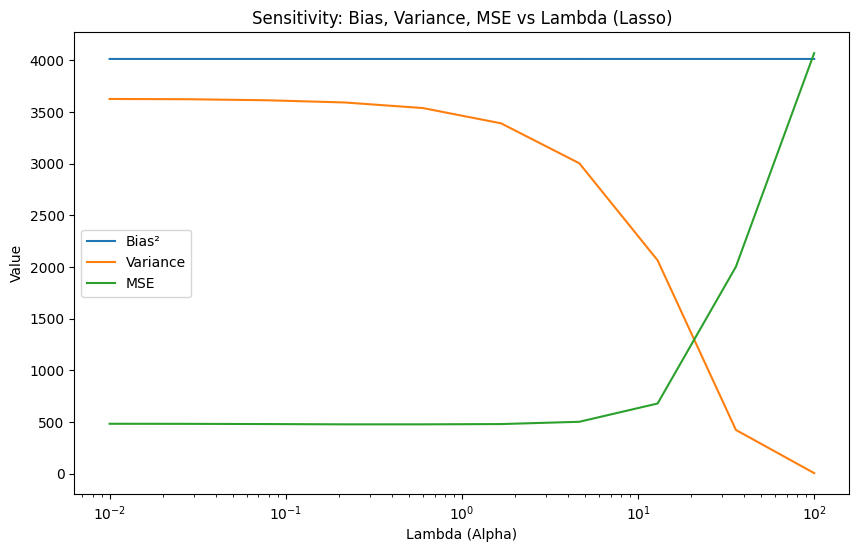

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load and split (same)

# Scale full X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function for bias-variance (using CV predictions)
def bias_variance_decomp(model, X, y, alpha):
    model.alpha = alpha
    y_pred_cv = cross_val_predict(model, X, y, cv=5)
    mse = mean_squared_error(y, y_pred_cv)
    bias = np.mean((y - y_pred_cv.mean())**2)  # Approx bias^2
    variance = np.mean(np.var(y_pred_cv))
    return bias, variance, mse

# Lambdas (alphas)
alphas = np.logspace(-2, 2, 10)  # 0.01 to 100

# For Lasso
biases, variances, mses = [], [], []
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    bias, var, mse = bias_variance_decomp(lasso, X_scaled, y, alpha)
    biases.append(bias)
    variances.append(var)
    mses.append(mse)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(alphas, biases, label='Bias²')
plt.plot(alphas, variances, label='Variance')
plt.plot(alphas, mses, label='MSE')
plt.xscale('log')
plt.xlabel('Lambda (Alpha)')
plt.ylabel('Value')
plt.title('Sensitivity: Bias, Variance, MSE vs Lambda (Lasso)')
plt.legend()
plt.show()